In [37]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
data = pd.read_csv("Cardekho.csv")

data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [4]:
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [5]:
data.notnull()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,True,True,True,True,True,True,True,True,True,True,True,True,True
15407,True,True,True,True,True,True,True,True,True,True,True,True,True
15408,True,True,True,True,True,True,True,True,True,True,True,True,True
15409,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
data.shape

(15411, 13)

In [9]:
'''Check for null values
duplicates
wrong data'''
data["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6540\2431433529.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data["vehicle_age"], shade = True,color = "b" )


<Axes: xlabel='vehicle_age', ylabel='Density'>

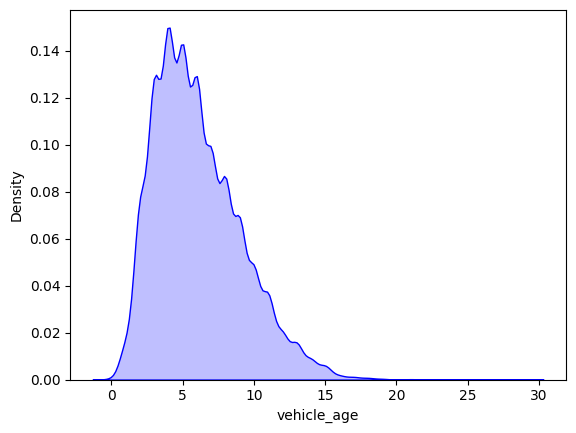

In [39]:
sns.kdeplot(x = data["vehicle_age"], shade = True,color = "b" )

In [40]:
# Check unique values of the 'brand' column
data["brand"].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [41]:
# Check value counts of the 'brand' column
data["brand"].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [42]:
data["car_name"].value_counts(normalize = True)*100

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64

In [43]:
# Normalize the fuel_type based on it's value_counts
data["fuel_type"].value_counts(normalize=True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [44]:
# Check the mean of the mileage column
round(float(data["mileage"].mean()),2)

19.7

# Exploratory data analysis(EDA)

1> Univariate analysis- in simple word analysis performed on one variable is called Univariate analysis.

2> Bivariate analysis- in simple words analysis done to find the correlation between 2 vairable is called bivariate analysis, usually one of the two                           variable is target variable.
                       and TARGET varibale is that variable which we want achieve or the one which remains same in every correlation combination.

3> Multivariant analysis - in simple words, it is a relationship between ultiple variables.

# Univariate analysis

In [45]:
numerical_variable = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
numerical_variable

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6540\1268395477.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = data[numerical_variable[i]], shade = True, color = "b")
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6540\1268395477.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = data[numerical_variable[i]], shade = True, color = "b")
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6540\1268395477.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = data[numerical_variable[i]], shade = True, color = "b")
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6540\1268395477.py:5: FutureWarning: 

`shade` 

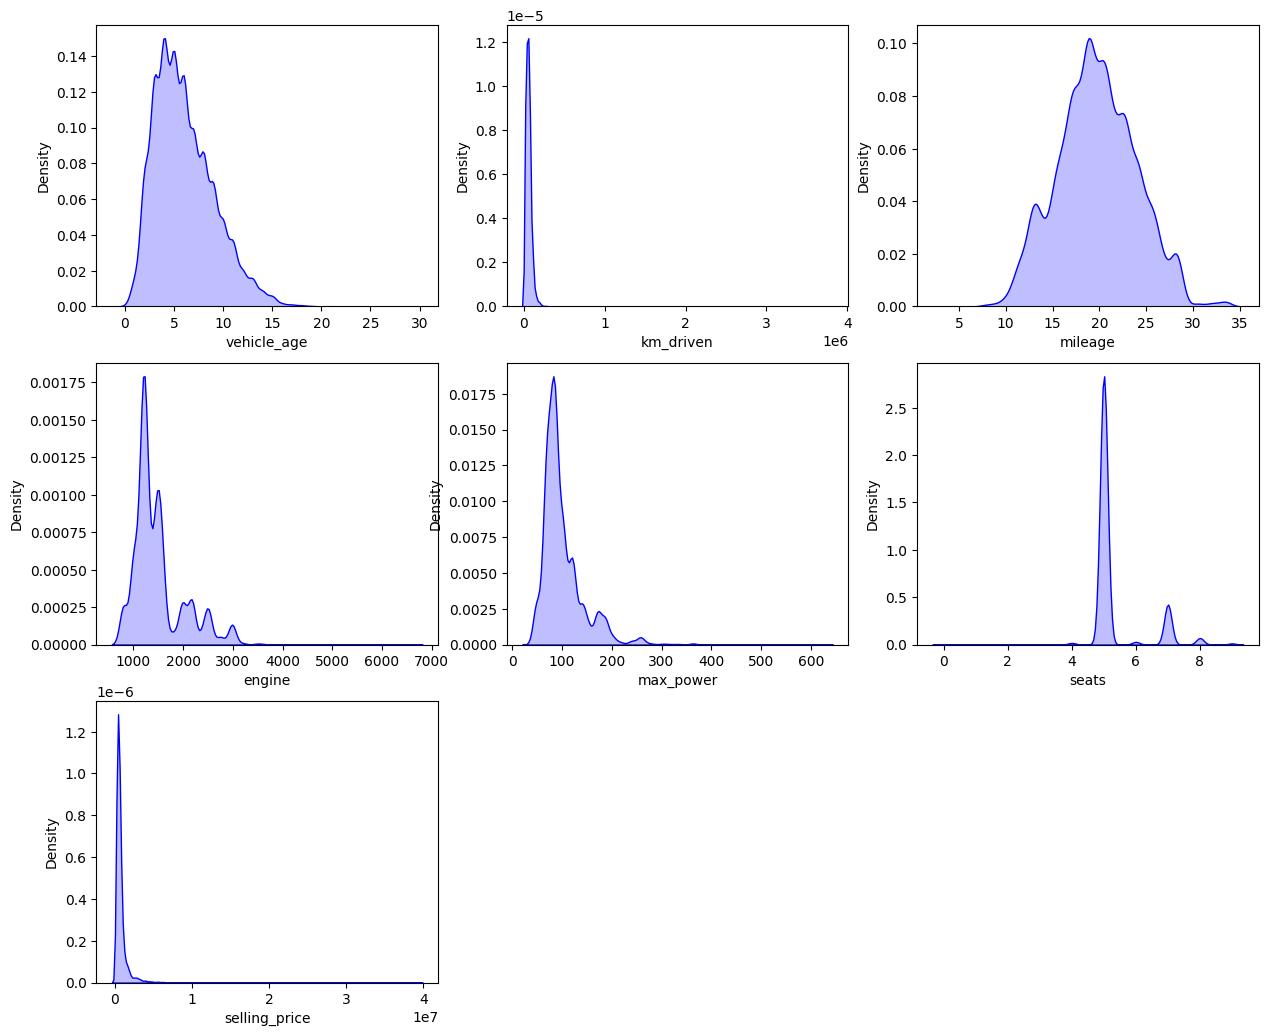

In [46]:
# Plot the density graphs of each of the numerical columns
plt.figure(figsize=(15, 30))
for i in range(len(numerical_variable)):
    plt.subplot(7, 3, i+1) 
    sns.kdeplot(data = data[numerical_variable[i]], shade = True, color = "b")

plt.show()

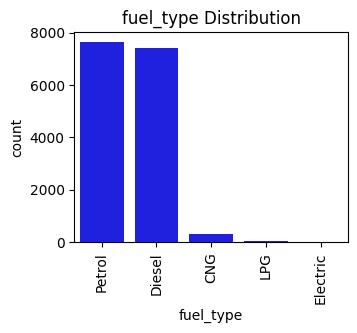

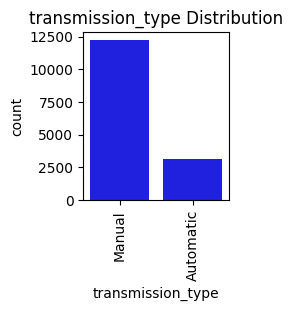

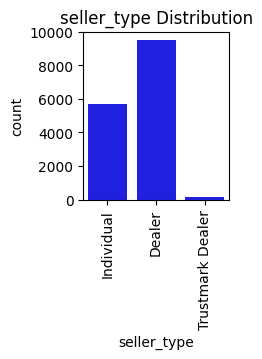

In [47]:
# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, data=data , color = "b") 
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation = 90)
    plt.show()

# Bivariate analysis

ValueError: num must be an integer with 1 <= num <= 6, not 7

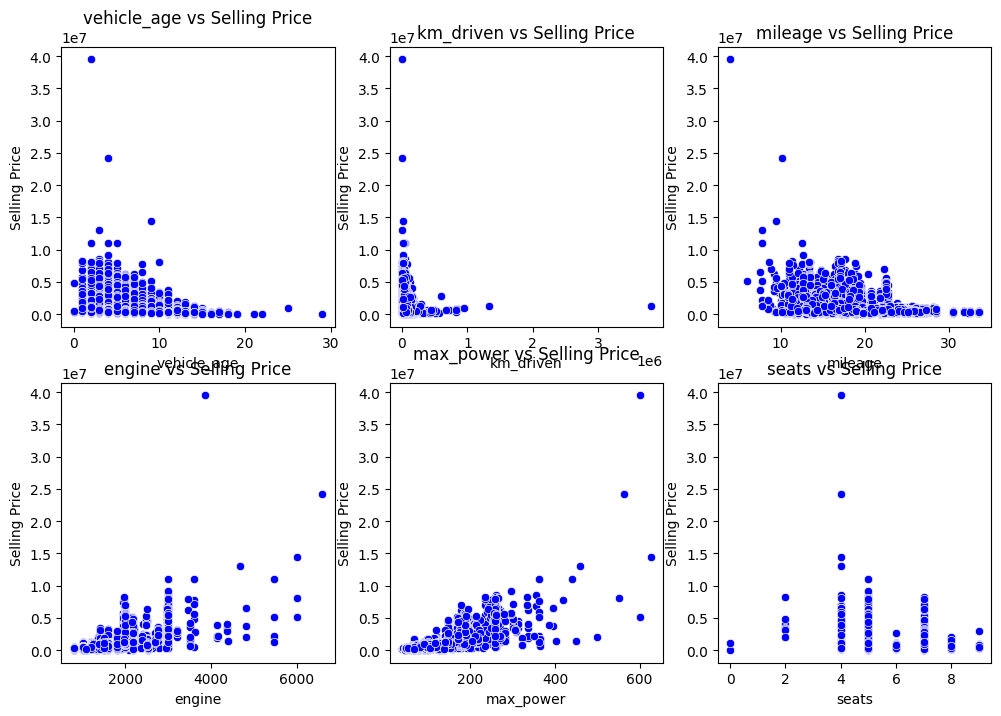

In [48]:
# Create subplots for scatter plots
plt.figure(figsize=(12,8))

# Scatter plot for each numerical variable vs selling price
for i, feature in enumerate(numerical_variable):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['selling_price'], color='b')
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

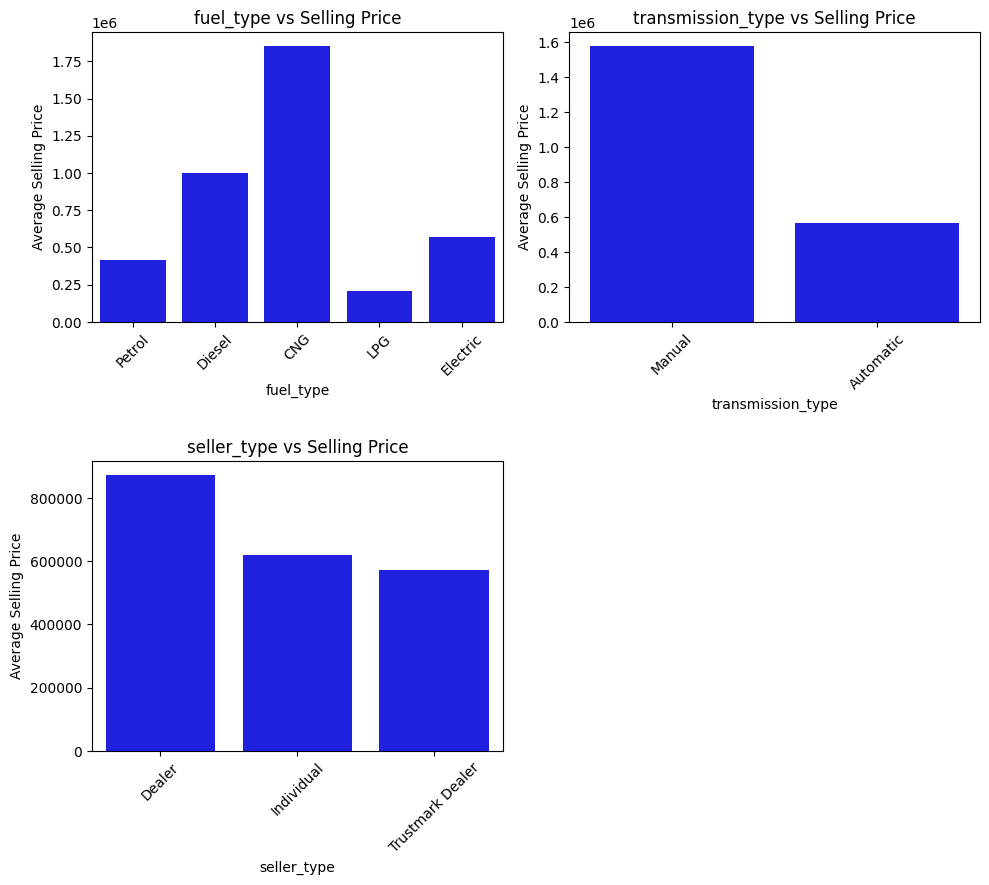

In [49]:
# Set figure size for the plots
plt.figure(figsize=(10,12))

# Create subplots for bar plots of categorical features vs selling price
for i, feature in enumerate(categorical_features):
    plt.subplot(3,2, i +1)
    sns.barplot(x=data[feature].value_counts().index, 
                y=data.groupby(feature)['selling_price'].mean().values,color = "b")
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Multivariate analysis

In [50]:
# Calculate the correlation matrix for selected numerical features
correlation_matrix = data[numerical_variable].corr()

# Display the correlation matrix
correlation_matrix

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

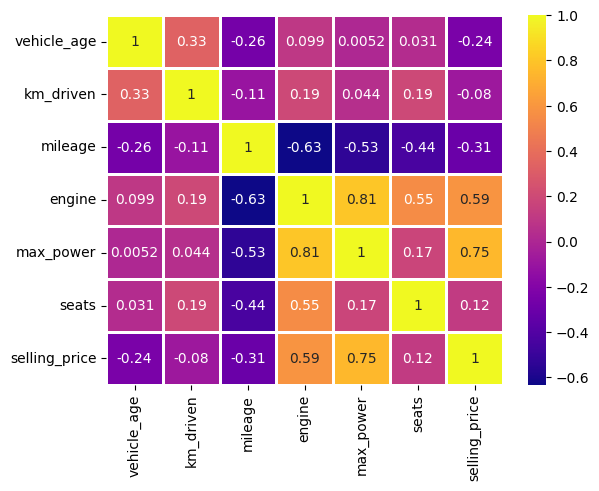

In [51]:
sns.heatmap(data = data[numerical_variable].corr() , annot = True , cmap = "plasma", linewidth = 1)

Summary of Correlation Insights:
>Vehicle Age vs. Selling Price:
>Negative correlation (-0.24): Older cars usually have lower prices.

>Kilometers Driven vs. Selling Price:
Weak negative correlation (-0.08): Minor effect on selling price.

>Mileage vs. Selling Price:
Moderate negative correlation (-0.31): Low-mileage cars tend to have higher prices.

?Engine Capacity vs. Selling Price:
Moderate positive correlation (0.59): Larger engines often lead to higher prices.

>Max Power vs. Selling Price:
Strong positive correlation (0.75): Higher max power correlates with higher prices.

>Seats vs. Selling Price:
Weak positive correlation (0.12): Minor effect on price.

The Strongest Relationships:
Engine vs. Max Power (0.81): Strongly linked, as expected for vehicle specifications.
Engine vs. Mileage (-0.63): Indicates a trade-off between performance (engine size) and efficiency (mileage).
The Weakest Relationships:
Vehicle Age vs. Max Power (0.0052): No notable effect of age on power.
Km Driven vs. Max Power (0.044): Distance traveled doesn't significantly impact the power of the vehicle.

>Other Key Insights:
Mileage & Engine Capacity: Strong negative correlation (-0.63).
Mileage & Max Power: Moderate negative correlation (-0.53).

>Conclusion:
Max Power is the strongest predictor of selling price.
Vehicle age, mileage, and km driven have expected negative correlations with selling price.

# Feature engineering ?

> Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. 
    In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more           accurate and efficient machine learning models.

Common practices in Feature engineering
1) Removing un-necessary Columns
        In our dataset coulms like "car_name , brand_name , model , seller_type" are trivial and shall be removed.

2) Converting datatype of columns
        In our dataset we had some important categorical columns that needed to be converted into numerical datatype for easier aggregation.

3) We remove the target variable 
        In our dataset we chose "selling_price" as our target variable which needs to be removed in order to achieve it.

In [52]:
'''We have made a copy of our dataset and we would perform all changes on it as it would be better for practicing 
   Feature engineering for building a machine learning model.'''

model_data = data.copy()

model_data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [53]:
# We have removed all those irrelavant coloumn 

model_data.drop(labels = ["car_name" , "brand" , "model" , "seller_type"], axis = 1 , inplace = True)

model_data

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...
15406,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [54]:
# We convert datatype of the categorical columns into numerical for easier aggregations for machine learning model.

model_data = pd.get_dummies(model_data, dtype = float)

model_data


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [55]:
X = model_data.drop('selling_price', axis=1)  # Independent variables
Y = model_data['selling_price']  # Target variable

# Splitting the Data into Training and Test Sets

In [56]:
# Split data into training (80%) and testing (20%) sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")
X = model_data.drop('selling_price', axis = 1)

Training set size: (12328, 13), Testing set size: (3083, 13)


Train regression model

In [57]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])

[ 638682.22307999  397474.83773181 1236430.14682858  643674.28602105
  145185.62824011]


In [58]:
test_Y

3660      675000
4478      500000
11163    1000000
12199     675000
10485     275000
          ...   
4698      625000
7298      755000
5100      850000
4855      371000
15173     499000
Name: selling_price, Length: 3083, dtype: int64

In [59]:
test_X['predicted_sales_price'] = predictions

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

In [60]:
test_X

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
3660,3,16285,18.60,1197,81.83,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.386822e+05,675000,-36317.776920
4478,5,31200,20.51,998,67.00,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.974748e+05,500000,-102525.162268
11163,9,81000,15.20,1968,140.80,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.236430e+06,1000000,236430.146829
12199,3,9300,18.60,1197,81.83,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.436743e+05,675000,-31325.713979
10485,8,61000,26.20,998,58.20,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.451856e+05,275000,-129814.371760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,6,72000,22.54,1396,88.73,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.911890e+05,625000,-33810.956201
7298,3,4200,17.00,1198,108.50,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.022359e+06,755000,267359.004024
5100,6,200000,12.99,2494,100.60,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.650541e+05,850000,-184945.884724
4855,4,27265,23.95,998,67.10,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.293687e+05,371000,158368.656578


Model Evaluation

>MSE measures the average squared differences between the predicted and actual values. It quantifies how far off your model's predictions are, penalizing larger errors more heavily due to squaring.

>RMSE is the square root of MSE. It expresses the error in the same units as the target variable, making it more interpretable than MSE.

>R-squared measures the proportion of variance in the target variable that’s explained by the features in the model. It’s a relative metric and ranges from 0 to 1 (or negative if the model is worse than a baseline).


Why Use All Three Metrics?
MSE: Focuses on the absolute size of the error.
RMSE: Scales this error to the same unit as the target variable for easier interpretation.
R-squared: Provides insight into how well the model fits the data and explains variance.

In [61]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_Y,predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 241069253929.15213
Root Mean Squared Error (RMSE): 490988.03847869055
R-squared: 0.6341254401060862


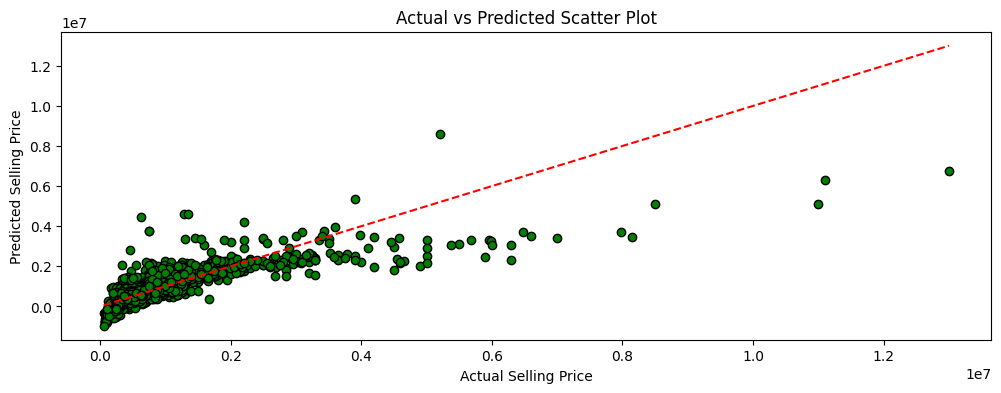

In [63]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(test_Y, predictions, color='green',edgecolor='black')
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')  
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

The red line represents the ideal line (where predicted values exactly match actual values). The scatter points show how close your predictions are to the actual prices. The closer the points are to the red line, the better the model.

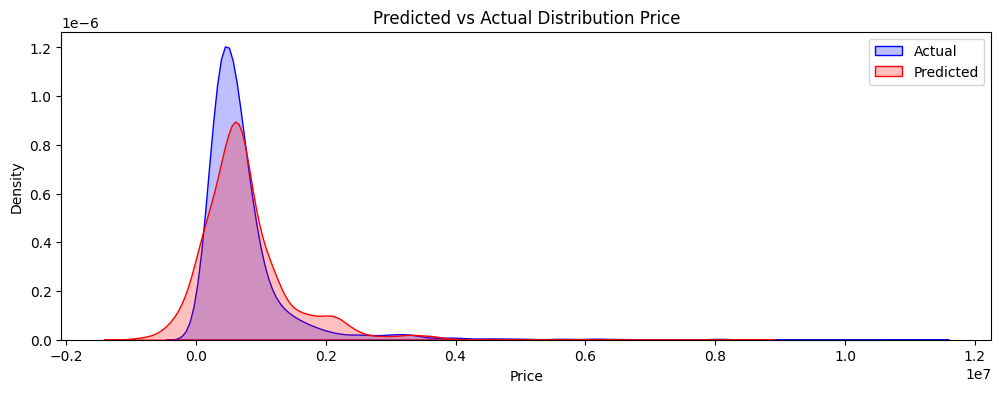

In [54]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12,4))
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In a good model, the predicted price distribution should closely match the actual price distribution. Any significant difference suggests the model isn't capturing the distribution of prices well.